# Cryptocurrency Market Analysis

In this project, we will analyze data from Yahoo Finance of three popular cryptocurrencies.

We will use Pandas to extract and analyze the information, visualize it, and analyze risks based on it's performance history.

Here are questions we will try to answer:

- Change in price over time?
- Daily return on average of a stock?
- Moving average of various stock?
- How much value do we put at risk by investing in a stock?

In [0]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#grab data imports
import pandas_datareader.data as pdr
from datetime import datetime

In [0]:
#We are going to analyze the top cryptocurrencies.
cc_list = ['BTC-USD','ETH-USD','LTC-USD']

In [0]:
#Setting the end date to today
end = datetime.today()

#Start date set to one year back
start = datetime(end.year-1,end.month,end.day)

In [0]:
#using yahoo finance to grab cryptocurrency data
BTC = pdr.DataReader('BTC-USD','yahoo',start,end)
ETH = pdr.DataReader('ETH-USD','yahoo',start,end)
LTC = pdr.DataReader('LTC-USD','yahoo',start,end)

In [5]:
#STATISTICS FOR BTC'S STOCK
BTC.describe()

,High,Low,Open,Close,Volume,Adj Close
count,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000
mean,6322.201006,5992.666113,6153.008545,6166.993191,3.843365e+08,6166.993191
std,2511.477651,2282.060211,2393.230968,2411.548945,3.206996e+08,2411.548945
min,3271.760010,3169.530029,3232.510010,3232.510010,5.672742e+07,3232.510010
25%,4018.497498,3849.284973,3938.335022,3938.335022,1.729807e+08,3938.335022
50%,6373.560059,6133.984863,6250.584961,6249.959961,2.915613e+08,6249.959961
75%,7392.299927,6896.610107,7166.364868,7200.434937,4.541172e+08,7200.434937
max,13826.759766,12117.309570,12913.280273,12913.280273,2.685872e+09,12913.280273


In [6]:
BTC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-08-07,6723.990234,6133.029785,6723.290039,6285.020020,838853615,6285.020020
2018-08-08,6631.229980,6195.020020,6285.060059,6543.240234,575748446,6543.240234
2018-08-09,6582.140137,6025.910156,6543.250000,6153.410156,639457019,6153.410156
2018-08-10,6488.549805,6014.259766,6152.950195,6242.540039,545722619,6242.540039
2018-08-11,6483.390137,6176.890137,6242.529785,6322.919922,366460108,6322.919922


In [7]:
#INFORMATION ABOUT BTC DATAFRAME
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2018-08-07 to 2019-08-08
Data columns (total 6 columns):
High         366 non-null float64
Low          366 non-null float64
Open         366 non-null float64
Close        366 non-null float64
Volume       366 non-null int64
Adj Close    366 non-null float64
dtypes: float64(5), int64(1)
memory usage: 20.0 KB


### Change in stock price over time 




Within the year, we can see the value of BTC almost reach up to 20K.

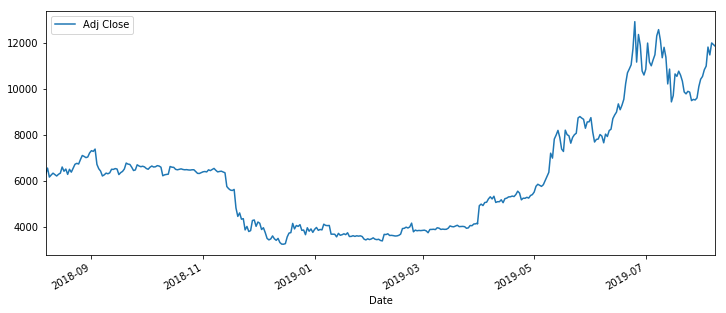

In [8]:
#Using pandas we canplot the stocks adjusted closing price
BTC['Adj Close'].plot(legend = True, figsize=(12,5))

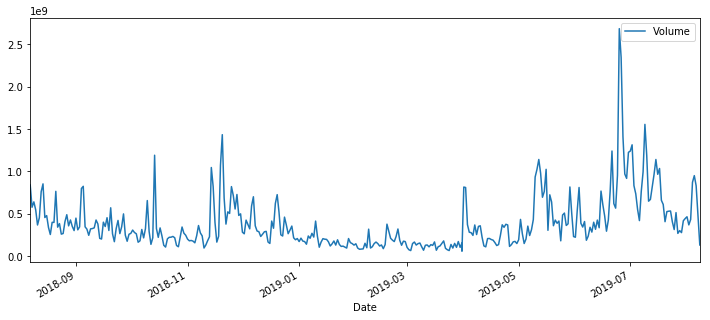

In [9]:
#Using pandas once more to plot the total volume being traded over time
BTC['Volume'].plot(legend=True,figsize=(12,5))

### Daily return on average of a stock?

In [12]:

#In order calculate daily return we can use the percentage change of the adjusted closing price

BTC['Daily Return'] = BTC['Adj Close'].pct_change()

BTC['Daily Return'].tail()

Date
2019-08-03    0.014648
2019-08-04    0.075513
2019-08-05   -0.028867
2019-08-06    0.045359
2019-08-08   -0.012089
Name: Daily Return, dtype: float64

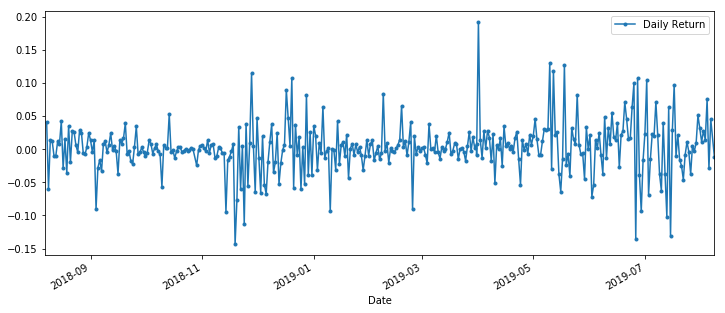

In [13]:
#Let us now plot the daily return
BTC['Daily Return'].plot(marker='.',legend=True,figsize=(12,5))

### Moving average stocks

In [0]:
#using pandas we will create moving averages for 10, 20 and 50 day periods of time

ma_days = [10,20,50]

for ma in ma_days:
    column_name = "MA %s days" %(str(ma))
    BTC[column_name] = BTC['Adj Close'].rolling(window=ma,center=False).mean()

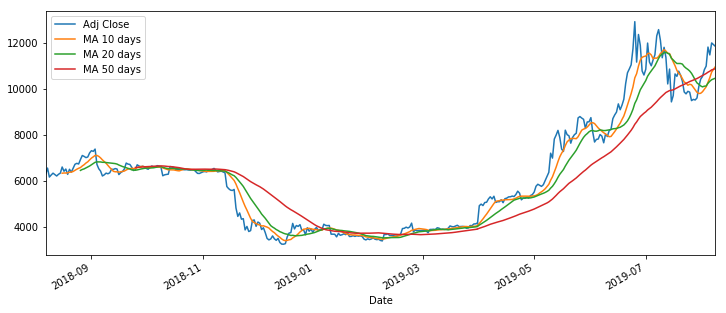

In [11]:
BTC[['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(legend=True,figsize=(12,5))


Generally some casual dips in the past month but overall an upward trend.